In [4]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import pandas as pd

# TLDR

Get the data

In [5]:
catalog_file = "/home/k/k203123/NextGEMS_Cycle2.git/experiments/ngc2009/scripts/ngc2009.json"
cat = intake.open_esm_datastore(catalog_file)
final_query = cat.search(realm="atm", frequency='30minute', variable_id='tas')
dataset_dict = final_query.to_dataset_dict(
    cdf_kwargs={
        "chunks": dict(
            time=1,
            # height=1,
        )
    }
)
keys = list(dataset_dict.keys())
data = dataset_dict[keys[0]]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.simulation_id.realm.frequency.time_reduction.grid_label.level_type'


Get the grid

In [6]:
grid_path = "/pool/data/ICON/grids/public/mpim/0015/icon_grid_0015_R02B09_G.nc"
grid = xr.open_dataset(grid_path)
model_lon_icon = grid.clon.values*180./np.pi
model_lat_icon = grid.clat.values*180./np.pi

Interpolate

In [7]:
lon = np.linspace(-30, 60, 90*10)
lat = np.linspace(33, 72, (72-33)*10)
lon2, lat2 = np.meshgrid(lon, lat)

points_icon = np.vstack((model_lon_icon, model_lat_icon)).T
data_sample = data.tas[1,0,:]

nn_interpolation = NearestNDInterpolator(points_icon, data_sample.values)
interpolated_nn = nn_interpolation((lon2, lat2))

Plot

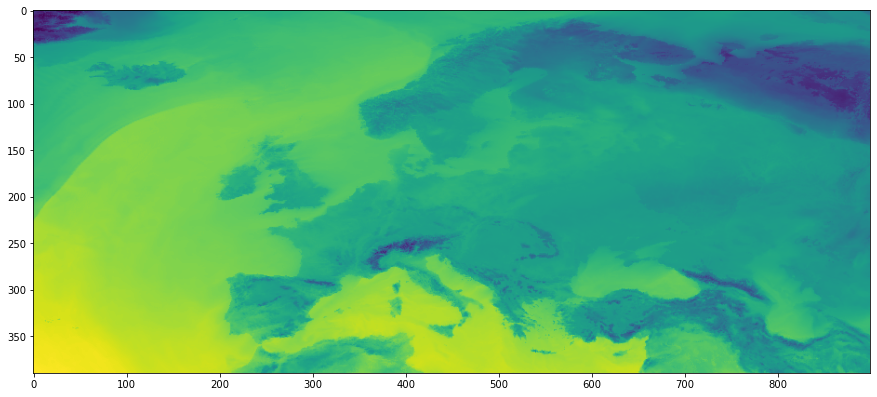

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn))

## Longer version

In [2]:
catalog_file = "/home/k/k203123/NextGEMS_Cycle2.git/experiments/ngc2009/scripts/ngc2009.json"

In [3]:
cat = intake.open_esm_datastore(catalog_file)
cat

,unique
variable_id,155
project,1
institution_id,1
source_id,1
experiment_id,1
simulation_id,1
realm,2
frequency,6
time_reduction,2
grid_label,1


In [5]:
def get_from_cat(catalog, columns):
    if type (columns) == type (""):
        columns = [columns]
    return catalog.df[columns].drop_duplicates().sort_values(columns)

In [6]:
pd.set_option("max_colwidth", None)
overview = get_from_cat(cat, ["experiment_id", "source_id", "realm", "frequency", "variable_id"])
overview

,experiment_id,source_id,realm,frequency,variable_id
4945,nextgems_cycle2,ICON-ESM,atm,1day,"(clt, evspsbl, tas, ts, rldscs, rlutcs, rsdscs, rsuscs, rsutcs)"
7789,nextgems_cycle2,ICON-ESM,atm,1day,"(psl, clt, evspsbl, tas, ts, rldscs, rlutcs, rsdscs, rsuscs, rsutcs)"
49,nextgems_cycle2,ICON-ESM,atm,2hour,"(phalf,)"
145,nextgems_cycle2,ICON-ESM,atm,30minute,"(hydro_canopy_cond_limited_box, hydro_w_snow_box, hydro_snow_soil_dens_box)"
129,nextgems_cycle2,ICON-ESM,atm,30minute,"(hydro_discharge_ocean_box, hydro_drainage_box, hydro_runoff_box, hydro_transpiration_box, sse_grnd_hflx_old_box)"
33,nextgems_cycle2,ICON-ESM,atm,30minute,"(psl, ps, sit, sic, tas, ts, uas, vas, cfh_lnd)"
17,nextgems_cycle2,ICON-ESM,atm,30minute,"(sfcwind, clivi, cllvi, cptgzvi, hfls, hfss, prlr, pr, prw, qgvi, qrvi, qsvi, rlds, rlus, rlut, rsds, rsdt, rsus, rsut, tauu, tauv, rpds_dir, rpds_dif, rvds_dif, rnds_dif)"
97,nextgems_cycle2,ICON-ESM,atm,6hour,"(clw, cli, pfull)"
161,nextgems_cycle2,ICON-ESM,atm,6hour,"(hydro_w_soil_sl_box, hydro_w_ice_sl_box, sse_t_soil_sl_box)"
81,nextgems_cycle2,ICON-ESM,atm,6hour,"(ta, hus, rho)"


In [8]:
cat.search(realm="atm", frequency='30minute', variable_id='tas')

,unique
variable_id,9
project,1
institution_id,1
source_id,1
experiment_id,1
simulation_id,1
realm,1
frequency,1
time_reduction,1
grid_label,1


In [9]:
final_query = cat.search(realm="atm", frequency='30minute', variable_id='tas')

In [10]:
dataset_dict = final_query.to_dataset_dict(
    cdf_kwargs={
        "chunks": dict(
            time=1,
            # height=1,
        )
    }
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.simulation_id.realm.frequency.time_reduction.grid_label.level_type'


In [11]:
dataset_dict

{'nextGEMS.MPI-M.ICON-ESM.nextgems_cycle2.ngc2009.atm.30minute.inst.gn.ml': <xarray.Dataset>
 Dimensions:  (time: 37009, height: 1, ncells: 20971520)
 Coordinates:
   * height   (height) float64 2.0
   * time     (time) datetime64[ns] 2020-01-20 2020-01-20T00:30:00 ... 2022-03-01
 Dimensions without coordinates: ncells
 Data variables:
     tas      (time, height, ncells) float32 dask.array<chunksize=(1, 1, 20971520), meta=np.ndarray>
 Attributes: (12/13)
     intake_esm_varname:      ['tas']
     history:                 ./icon at 20220512 152214\n./icon at 20220512 19...
     CDI:                     Climate Data Interface version 1.8.3rc (http://m...
     number_of_grid_used:     15
     references:              see MPIM/DWD publications
     grid_file_uri:           http://icon-downloads.mpimet.mpg.de/grids/public...
     ...                      ...
     source:                  git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69...
     title:                   ICON simulation
     

In [12]:
keys = list(dataset_dict.keys())
keys

['nextGEMS.MPI-M.ICON-ESM.nextgems_cycle2.ngc2009.atm.30minute.inst.gn.ml']

In [13]:
data = dataset_dict[keys[0]]
data

<xarray.Dataset>
Dimensions:  (time: 37009, height: 1, ncells: 20971520)
Coordinates:
  * height   (height) float64 2.0
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T00:30:00 ... 2022-03-01
Dimensions without coordinates: ncells
Data variables:
    tas      (time, height, ncells) float32 dask.array<chunksize=(1, 1, 20971520), meta=np.ndarray>
Attributes: (12/13)
    intake_esm_varname:      ['tas']
    history:                 ./icon at 20220512 152214\n./icon at 20220512 19...
    CDI:                     Climate Data Interface version 1.8.3rc (http://m...
    number_of_grid_used:     15
    references:              see MPIM/DWD publications
    grid_file_uri:           http://icon-downloads.mpimet.mpg.de/grids/public...
    ...                      ...
    source:                  git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69...
    title:                   ICON simulation
    Conventions:             CF-1.6
    institution:             Max Planck Institute for Meteorology/Deutscher W...
    uuidOfHGrid:             0f1e7d66-637e-11e8-913b-51232bb4d8f9
    intake_esm_dataset_key:  nextGEMS.MPI-M.ICON-ESM.nextgems_cycle2.ngc2009....

In [32]:
data_sample = data.tas[1,0,:]

In [33]:
data_sample

<xarray.DataArray 'tas' (ncells: 20971520)>
dask.array<getitem, shape=(20971520,), dtype=float32, chunksize=(20971520,), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
    time     datetime64[ns] 2020-01-20T00:30:00
Dimensions without coordinates: ncells
Attributes:
    standard_name:                tas
    long_name:                    temperature in 2m
    units:                        K
    param:                        0.0.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [34]:
data_sample.shape

(20971520,)

In [35]:
data_sample.values

array([256.32822, 255.8848 , 256.06198, ..., 282.19763, 282.13882,
       282.09595], dtype=float32)

In [36]:
grid_path = "/pool/data/ICON/grids/public/mpim/0015/icon_grid_0015_R02B09_G.nc"
grid = xr.open_dataset(grid_path)

Model Grid

In [37]:
model_lon_icon = grid.clon.values*180./np.pi
model_lat_icon = grid.clat.values*180./np.pi

In [38]:
model_lon_icon.shape

(20971520,)

Target grid

In [39]:
lon = np.linspace(-30, 60, 90*10)
lat = np.linspace(33, 72, (72-33)*10)
lon2, lat2 = np.meshgrid(lon, lat)

In [40]:
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator

In [41]:
points_icon = np.vstack((model_lon_icon, model_lat_icon)).T

In [42]:
nn_interpolation = NearestNDInterpolator(points_icon, data_sample.values)

In [43]:
interpolated_nn = nn_interpolation((lon2, lat2))

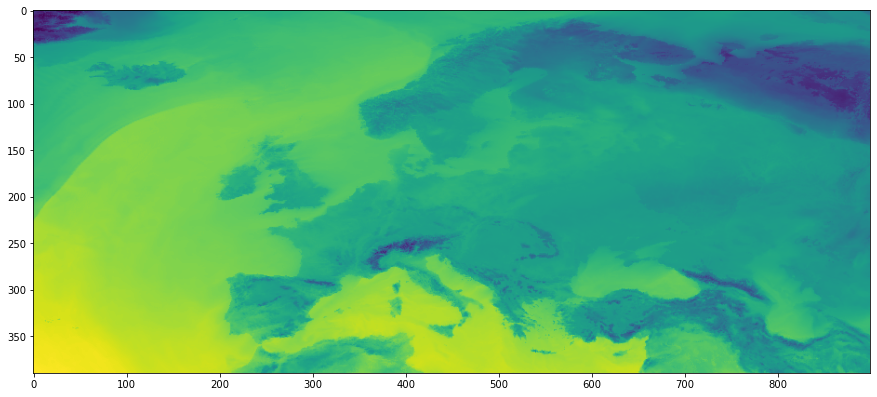

In [44]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn))

## Find point on the map

In [45]:
def tunnel_fast1d(latvar, lonvar, lonlat):
    """
    Find closest point in a set of (lat,lon) points to specified pointd.
    Parameters:
    -----------
        latvar : ndarray
            1d array with lats
        lonvar : ndarray
            1d array with lons
        lonlat : ndarray
            2d array with the shape of [2, number_of_point],
            that contain coordinates of the points
    Returns:
    --------
        node : int
            node number of the closest point
    Taken from here http://www.unidata.ucar.edu/blogs/developer/en/entry/accessing_netcdf_data_by_coordinates
    and modifyed for 1d
    """

    rad_factor = np.pi / 180.0  # for trignometry, need angles in radians
    # Read latitude and longitude from file into numpy arrays
    latvals = latvar[:] * rad_factor
    lonvals = lonvar[:] * rad_factor

    # Compute numpy arrays for all values, no loops
    clat, clon = np.cos(latvals), np.cos(lonvals)
    slat, slon = np.sin(latvals), np.sin(lonvals)

    clat_clon = clat * clon
    clat_slon = clat * slon

    lat0_rad = lonlat[1, :] * rad_factor
    lon0_rad = lonlat[0, :] * rad_factor

    delX_pre = np.cos(lat0_rad) * np.cos(lon0_rad)
    delY_pre = np.cos(lat0_rad) * np.sin(lon0_rad)
    delZ_pre = np.sin(lat0_rad)

    nodes = np.zeros((lonlat.shape[1]))
    for i in range(lonlat.shape[1]):
        delX = delX_pre[i] - clat_clon
        delY = delY_pre[i] - clat_slon
        delZ = delZ_pre[i] - slat
        dist_sq = delX ** 2 + delY ** 2 + delZ ** 2
        minindex_1d = dist_sq.argmin()  # 1D index of minimum element
        node = np.unravel_index(minindex_1d, latvals.shape)
        nodes[i] = node[0]

    return nodes.astype('int')

In [46]:
lon_target = -10
lat_target = 50

In [47]:
points = np.array([[lat_target],[lon_target]])

In [48]:
index = tunnel_fast1d(model_lon_icon, model_lat_icon, points)

In [49]:
model_lon_icon[index[0]]

-10.02962396505484

In [50]:
model_lat_icon[index[0]]

49.97659189571888

In [52]:
data.tas

<xarray.DataArray 'tas' (time: 37009, height: 1, ncells: 20971520)>
dask.array<concatenate, shape=(37009, 1, 20971520), dtype=float32, chunksize=(1, 1, 20971520), chunktype=numpy.ndarray>
Coordinates:
  * height   (height) float64 2.0
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T00:30:00 ... 2022-03-01
Dimensions without coordinates: ncells
Attributes:
    standard_name:                tas
    long_name:                    temperature in 2m
    units:                        K
    param:                        0.0.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [53]:
data.tas[:,0, index[0]]

<xarray.DataArray 'tas' (time: 37009)>
dask.array<getitem, shape=(37009,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T00:30:00 ... 2022-03-01
Attributes:
    standard_name:                tas
    long_name:                    temperature in 2m
    units:                        K
    param:                        0.0.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

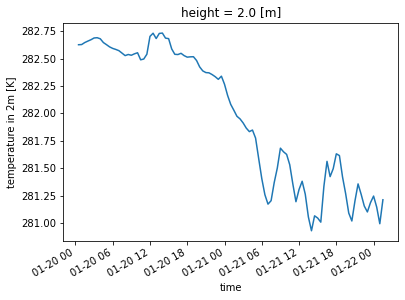

In [55]:
data.tas[1:100, 0, index[0]].plot()

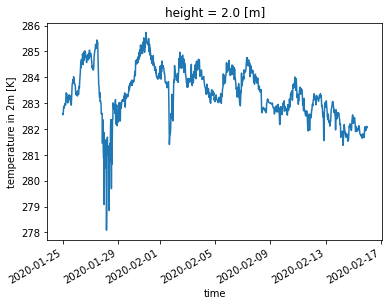

In [56]:
data.tas.sel(time=slice('2020-01-25','2020-02-15'))[:,0,index[0]].plot()